In [1]:
# iterable -> 값을 하나씩 제공해주는 객체. -> fot in 문에서 사용할 수 있는 객체.
# iteravle(값들을 저장 + iterator를 생성) + iterator(iterable의 값을 제공) = for in

l = [1, 2, 3, 4]
for i in l :
    print(i)

1
2
3
4


In [2]:
# iterable 에서 iterator 생성
iterator = iter(l)
print(type(iterator))

<class 'list_iterator'>


In [ ]:
next(iterator)

In [3]:
### for i in l
# iterator = iter(l)
while True:
    try:
        i = next(iterator)
        print(i)
    except:
      break

1
2
3
4


In [ ]:
## callable -> 호출해서 실행시키는것 (함수, 객체:__call__())

In [ ]:
# iterable 타입을 구현
## class로 구현
## __iter__(self) 메소드 구현 => iterator 를 반환.

# iterator 타입을 구현
## class로 구현
## __next__(self) 메소드를 구현 --> iterable의 원소들을 하나씩 순서대로 반환.
##                                값이 없으면 StopIteration Exception을 발생.

In [4]:
# substriptable 타입 - indexing 으로 값을 조회가능한 객체. => index 연산자 사용가능.
## 클래스로 구현
### __getitem__(self, index): index의 값을 반환하도록 구현. => s[index]
### __len__(self): 원소의 개수를 반환. => len()

1

In [5]:
# set 은 iterable 이지만,  substriptable로 반환 불가
s = {1, 2, 3}
for a in s:
    print(a)

1
2
3


In [6]:
s[0]

TypeError: 'set' object is not subscriptable

# Dataset 과 DataLoader

-   딥러닝 모델을 학습시키고 평가할때 제공할 데이터셋을 관리하기 위한 클래스.
    -   `Dataset`은 데이터셋을 관리하고 `DataLoader`는 Model에 데이터를 제공하는 것을 관리한다.
-   **torch.utils.data.Dataset**
    -   원본 데이터셋(input/output dataset)의 위치를 가지고 있으면서 indexing으로 데이터를 **하나씩 제공**한다.
        -   제공시 data augmentation등 원본데이터를 변환해서 제공 할 수 있다.
    -   subscriptable, iterable 타입.
        > **subscriptable타입**: indexing을 이용해 원소 조회가 가능한 타입  
        > Dataset은 **slicing과 fancy indexing은 지원하지 않는다.** 즉 한번에 여러개 데이터조회를 지원하지 않는다.
-   **torch.utils.data.DataLoader**
    -   Dataset이 제공하는 데이터를 batch size 단위 묶어서 모델에 제공하기 위한 객체.
        -   iterable 타입
    -   Dataset이 가지고 있는 **데이터를 모델에 어떻게 제공**할 지 batch size, shuffle 여부 등을 설정한다.
-   **Dataset과 DataLoader 관계**
    -   **Dataset은** raw data를 하나씩 읽어서 제공하는 기능만 제공한다.
        -   **데이터를 읽어오는 것이 목적**
    -   **DataLoader는** Dataset에 데이터를 모델에 주입할 batch 크기 만큼 가져오는 역할을 한다.
        -   **데이터를 model에 제공하는 것이 목적**


# Built-in Dataset

-   파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
-   모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    -   [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    -   [audio dataset](https://pytorch.org/audio/stable/datasets.html)
    -   [text dataset](https://pytorch.org/text/stable/datasets.html)


## Image Built-in dataset Loading

torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

-   각 Dataset 클래스의 주요 매개변수 (클래스들 마다 약간의 차이가 있다.)
    -   **root**: str
        -   Raw data를 저장할 디렉토리 경로
    -   **train**: bool
        -   True일경우 Train set을 False일 경우 Test set을 load
    -   **download**: bool
        -   True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    -   **transform**: function
        -   Loading한 이미지를 변환하는 function.
            -   Normalization이나 data Agumentation 처리를 한다.


In [4]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [5]:
mnist_data_dir = "datasets"
mnist_trainset = datasets.MNIST(
    root=mnist_data_dir,  # raw data의 위치.
    download=True,        # root 에 없을 경우 다운받을지 여부
    train=True,           # True:train set. False : test set
)

In [6]:
print(type(mnist_trainset))

<class 'torchvision.datasets.mnist.MNIST'>


In [7]:
isinstance(mnist_trainset, Dataset)

True

In [8]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train

In [9]:
# Dataset 의 총 데이터 개수를 조회 - len()
len(mnist_trainset)

60000

In [10]:
# 개별 데이터를 조회 -> indexing
mnist_trainset[0]  # tuple(X, y) 로 묶여서 반환 됨.

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [11]:
d = mnist_trainset[0]
d[0]

In [12]:
d[1]  # 5번 인덱스의 라벨

5

In [13]:
mnist_trainset2 = datasets.MNIST(
    root=mnist_data_dir,  
    download=True,        
    train=True,
    transform=transforms.ToTensor()  # 전처리 함수/객체(__call__()를 설정.
    )     

In [14]:
d2 = mnist_trainset2[0]
d2[1]

5

In [15]:
# ToTensor() 의 전처리 작업
print(d2[0].type())             # PIL.Image, np.ndarray -> pytorch Tensor 로 변환
print(d2[0].min(), d2[0].max()) # 0 ~ 1 사이로 scaling.  (MinMaxScaling)
print(d2[0].shape)              # channerl first 로 shape을 변경. (channel, height, width)

torch.FloatTensor
tensor(0.) tensor(1.)
torch.Size([1, 28, 28])


In [16]:
mnist_trainset.class_to_idx
# dict: key-class name, value: class  name

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [17]:
pred_class = 3 # 모델 예측 결과
mnist_trainset.classes[pred_class]

'3 - three'

### TODO: CIFAR10 Dataset loading

-   CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train dataset, test dataset의 데이터 개수 확인
    1. class index - class name 확인
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.


In [18]:
datasets.CIFAR10?

Init signature:
datasets.CIFAR10(
    root: Union[str, pathlib.Path],
    train: bool = True,
    transform: Optional[Callable] = None,
    target_transform: Optional[Callable] = None,
    download: bool = False,
) -> None
Docstring:     
`CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.

Args:
    root (str or ``pathlib.Path``): Root directory of dataset where directory
        ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
    train (bool, optional): If True, creates dataset from training set, otherwise
        creates from test set.
    transform (callable, optional): A function/transform that takes in a PIL image
        and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the
        target and transforms it.
    download (bool, optional): If true, downloads the dataset from the internet and
        puts it in root directory. If dataset is alre

In [19]:
trainset = datasets.CIFAR10(root="datasets", train=True, download=True)
testset = datasets.CIFAR10(root="datasets", train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
from torchvision import datasets, transforms

# Define the directory for dataset storage
cifar_data_dir = "datasets"

# Download the CIFAR-10 training set
trainset = datasets.CIFAR10(
    root=cifar_data_dir,  # Specify the directory correctly
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

# Download the CIFAR-10 test set
testset = datasets.CIFAR10(
    root=cifar_data_dir,  # Use the same directory
    train=False,
    download=True,
    transform=transforms.ToTensor()
)


Files already downloaded and verified
Files already downloaded and verified


In [21]:
len(trainset), len(testset)

(50000, 10000)

In [22]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [23]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [24]:
trainset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

TypeError: Invalid shape (3, 32, 32) for image data

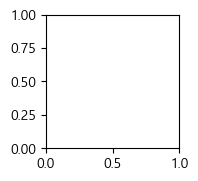

In [25]:
# matplotlib
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(15):
    idx = random.randint(0, len(trainset)) # 0 ~ 50000 사이의 정수를 랜덤하게 반환.
    img, label = trainset[idx] # (X, y)
    plt.subplot(3, 5, i+1)
    plt.imshow(img)  # PIL.Image, ndarray, torch.Tensor
    plt.title(f"{label}-{trainset.classes[label]}")
    plt.axis("off")
    
plt.tight_layout()
plt.show()

In [ ]:
trainset.classes[]

SyntaxError: invalid syntax (3146671325.py, line 1)

In [ ]:
from IPython.display import display


for i in range(5):
    print(trainset[i][1])
    display(trainset[i][0])

### transform 매개변수를 이용한 데이터전처리

-   Dataset 생성할 때 전달하는 함수로 원본 영상 데이터를 모델에 주입(feeding)하기 전 **전처리 과정을 정의한다.**
    -   Data Pipeline을 구성하는 함수
-   매개변수로 input data 한개를 입력받아 처리한 결과를 반환하도록 구현한다.


### torchvision.transforms.ToTensor

-   PIL Image나 NumPy ndarray 를 FloatTensor(float32) 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 \[0., 1.\] 범위로 비례하여 조정한다.
-   Image 의 shape을 (channel, height, width) 로 변경한다.
-   https://pytorch.org/vision/stable/transforms.html


In [26]:
tt = transforms.ToTensor()
print(type(trainset[0][0]))

return_data = tt(trainset[0][0])
return_data
return_data.shape, return_data.min(), return_data.max(), return_data.type()

<class 'torch.Tensor'>


TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

### transform.Normalize

-   채널별로 지정한 평균을 뺀 뒤 지정한 표준편차로 나누어서 정규화를 진행한다.
-   ToTensor()로 변환된 데이터를 받아서 추가 변환
    -   여려 변환 순서대로 한번에 할 경우 `torchvision.transforms.Compose` 클래스를 이용해서 묶어준다.


In [27]:
return_data.shape

NameError: name 'return_data' is not defined

In [29]:
nt = transforms.Normalize(mean=10, std=2)  # (X-mean)/std
ret_data2 = nt(return_data)
ret_data2

NameError: name 'return_data' is not defined

In [ ]:
# channel 별로 지정한 mean과 std로 nomalize로 처리.
nt2 = transforms.Nomalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# imageNet 에서 정규화한 데이터로 일반적으로 0.5 / 0.5 도 사용.

In [3]:
# 여러개의 transform 함수들을 사용할 경우 Compose()를 이용해 묶어준다.
# 지정한 순서대로 데이터를 처리한다.

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

ds = dastasets.MNIST(root="datasets", download=True, train=True, transform=transform)
ds[0][0]
d.min(), d.max()

NameError: name 'transforms' is not defined

## DataLoader 생성

-   DataLoader
    -   모델이 학습하거나 추론할 때 Dataset의 데이터를 모델에 제공해준다. (feeding)
    -   initalizer속성
        -   dataset: 값을 제공하는 Dataset 타입 객체
        -   batch_size: 한번에 값을 제공할 batch 크기
        -   shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        -   drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 모델에 제공하지 않는다.


In [30]:
from torch.utils.data import DataLoader

mnist_train_loader = DataLoader(mnist_trainset2, batch_size=1000, shuffle=True, drop_last=True)
# mnist_test_loader = DataLoader(mnist_testset, batch_siz=1000)

In [31]:
# step 수 
len(mnist_train_loader)

60

In [32]:
# DataLoader에서 Dataset을 조회
ds = mnist_train_loader.dataset
ds

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [33]:
for i in mnist_train_loader:
    print(i)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [34]:
# mnist_train_loader[0]

In [35]:
# 한 개 배치를 조회.
result = next(iter(mnist_train_loader))  # [X_batch, y_batch] list 로 반환됨
print(type(result), len(result))

<class 'list'> 2


In [36]:
X_train, y_train = next(iter(mnist_train_loader))

In [37]:
X_train.shape, y_train.shape

(torch.Size([1000, 1, 28, 28]), torch.Size([1000]))

# Custom Dataset 구현

1. `torch.utils.data.Dataset` 클래스를 상속한 클래스를 정의한다.
2. `__init__(self, ...)`
    - DataSet객체 생성시 필요한 설정들을 초기화 한다.
    - ex) Data저장 경로, transform 설정 여부 등
3. `__len__(self)`
    - 총 데이터 수를 반환하도록 구현한다.
    - DataLoader가 Batch 생성할 때 사용한다.
4. `__getitem__(self, index)`
    - index의 Data point를 반환한다.
    - input(X), output(y) 를 튜플로 반환한다.
    - transform이 있을 경우 변환처리한 input을 반환한다.


In [ ]:
# subscriptable 타입 객체(indexing가능한 type)
class MySub:

    def __init__(self):
        # 제공할 데이터들을 초기화.
        self.zero = "호랑이"
        self.one = "사자"
        self.two = "개"
        self.three = "고양이"


    def __len__(self):
        # 제공할 데이터의 개수를 반환.
        return 4
    
    def __getitem__(self, idx):
        # idx 번째 데이터를 반환 -> 객체[idx] ==>객체.__getietm__(idx)
        if idx == 0 :
            return self.zero
        elif idx == 1:
            return self.one
        elif idx == 2:
            return self.two
        elif idx ==3:
            return self.three
        else:
            raise IndexError(f"{idx}는 없는 index입니다.")
        

In [39]:
ms = MySub()
print(len(ms))

4


In [40]:
ms[3]

'고양이'

In [41]:
for i in ms:
    print(i)

호랑이
사자
개
고양이


## OxfordPet Dataset 생성

-   https://www.robots.ox.ac.uk/~vgg/data/pets/
-   개,고양이 37가지 품종
-   품종별로 200장 정도씩 구성됨. (품종별로 이미지 개수는 다르다)
-   목표
    -   train: 70%, validation: 20%, test: 10%


In [ ]:
# 1. 연결
# 2. 압축풀기
# 3. 

SyntaxError: invalid syntax (3562811048.py, line 1)

In [43]:
import os 
import re
from glob import glob
import tarfile # tar 압축 파일 다루는 모듈.
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [44]:
tar_file_path = 'datasets/images.tar.gz'        # 압축 파일 경로
dataset_path = "datasets/oxfordpet"             # 압축을 풀 경로
pet_dataset_path = "datasets/oxfordpet/images"  # 압축 풀린 이미지가 저장될 경로.

In [45]:
# 압출 풀기
with tarfile.open(tar_file_path) as tar:  # 압축 파일과 연결(open)
    tar.extractall(dataset_path)          # 압축 풀 경로를 넣어서 풀기. 생략시 현재 working directory 에 저장됨.


C:\Users\Playdata\AppData\Local\Temp\ipykernel_10540\951136087.py:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(dataset_path)          # 압축 풀 경로를 넣어서 풀기. 생략시 현재 working directory 에 저장됨.


In [46]:
# 이미지 파일들의 경로 조회
file_list = glob(pet_dataset_path+"/*.jpg")
file_list[:5], len(file_list)

(['datasets/oxfordpet/images\\Abyssinian_1.jpg',
  'datasets/oxfordpet/images\\Abyssinian_10.jpg',
  'datasets/oxfordpet/images\\Abyssinian_100.jpg',
  'datasets/oxfordpet/images\\Abyssinian_101.jpg',
  'datasets/oxfordpet/images\\Abyssinian_102.jpg'],
 7390)

In [47]:
# 파일명 구성: className_번호.ㅓㅔㅎ
#            대문자로 시작 : 고양이,   소문자로 시작 : 개
# 파일경로에서 Laber(class)를 추출
f = file_list[0]
print("파일경로에서 디렉토릭경로만조회:", os.path.dirname(f))
print("파일경로에서 파일명만 조회:", os.path.basename(f))
print("파일명세서 파일명과 확장자를 분리:", os.path.splitext(f))  # 확장자와 나머지를 분리.

파일경로에서 디렉토릭경로만조회: datasets/oxfordpet/images
파일경로에서 파일명만 조회: Abyssinian_1.jpg
파일명세서 파일명과 확장자를 분리: ('datasets/oxfordpet/images\\Abyssinian_1', '.jpg')


In [48]:
# ex) 파일명세서 파일명과 확장자를 분리
os.path.splitext("abcde.txt")

('abcde', '.txt')

In [49]:
## jpg color(RGB) 이미지만 남기고 삭제
remove_cnt = 0  # 몇장 지웠는지 확인용.
for file in file_list:
    # 이미지 연결(open)
    with Image.open(file) as img:
        img_mode = img.mode  # "RGB" : rgb color, 'L':gray scale
    if img_mode != "RGB":
        # RGB 아닌 파일은 삭제
        os.remove(file)
        remove_cnt += 1
        print(f"삭제한 파일명: {os.path.basename(file)}")

삭제한 파일명: Abyssinian_34.jpg
삭제한 파일명: Abyssinian_5.jpg
삭제한 파일명: Egyptian_Mau_129.jpg
삭제한 파일명: Egyptian_Mau_139.jpg
삭제한 파일명: Egyptian_Mau_14.jpg
삭제한 파일명: Egyptian_Mau_145.jpg
삭제한 파일명: Egyptian_Mau_167.jpg
삭제한 파일명: Egyptian_Mau_177.jpg
삭제한 파일명: Egyptian_Mau_186.jpg
삭제한 파일명: Egyptian_Mau_191.jpg
삭제한 파일명: staffordshire_bull_terrier_2.jpg
삭제한 파일명: staffordshire_bull_terrier_22.jpg


In [50]:
remove_cnt

12

In [51]:
# 이미지 파일 경로 목록을 갱신.
file_list = glob(pet_dataset_path+"/*.jpg")
len(file_list)

7378

In [52]:
# mnist_trainset.classes   # index_to_class
mnist_trainset.class_to_idx  # class_to_index

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

### index_to_class, class_to_index 생성

-   **index**: class index 번호(0, 1, 2), **class**: class 이름 (dog, cat, ..)
-   **index_to_class**: class들을 가지는 리스트. index(0, 1, ..)로 class 조회
    -   index를 주면 class 이름을 반환
-   **class_to_index**: key: 클래스이름, value: index -> class이름 넣으면 index 반환
    -   class 이름을 주면 index를 반환
-   Oxford PET - 파일명이 class
    -   대문자로 시작: 고양이, 소문자로 시작: 개
    -   파일명: 품종\_번호.jpg


In [53]:
# class <-> index  교환.
### 수기로 직접 작성.
# index_to_class = ["개", "고양이"]

In [68]:
f = file_list[1234]
f

'datasets/oxfordpet/images\\Maine_Coon_147.jpg'

In [71]:
### 파일명을 이용하여 작성.
f = file_list[1234]
file_name = os.path.basename(f)
# label = file_name.split("_")[0]
label = re.sub(r"_\d+.jpg", "", file_name)

# 이미지로 개 와 고양이 를 구분.
# file_name[0].isupper() # 0번 문자열이 대문자이면 True, 소문자이면 False
label2 = "고양이" if file_name[0].isupper() else "개"
print(label, label2)



Maine_Coon 고양이


In [72]:
f = file_list[1234]
file_name = os.path.basename(f)
file_name

'Maine_Coon_147.jpg'

In [73]:
# 정규 표현식
import re

f = file_list[1234]
file_name = os.path.basename(f)
print(file_name)

# _번호.jpg 패턴을 file_name(문자열)에서 제거.
re.sub(r"_\d+.jpg", "", file_name)  # \d: 숫자1개  + (앞의 패턴 1개 이상 나온다.)  바꿀 문자를 "" 빈 문자열로 받음.
#("패턴", "변경할문자열", 대상)

Maine_Coon_147.jpg


'Maine_Coon'

In [ ]:
class_name_set = set()  # 중복제거를 위해 빈 set을 생성함.
for f in file_list:
    file_name = os.path.basename(f) # 파일명만 조회
    label = re.sub(r"_\d+.jpg", "", file_name)  # Maine_Coon_147.jpg  -> _147.jpg 를 제거함.
    class_name_set.add(label)

In [75]:
index_to_class = list(class_name_set)
index_to_class.sort()  # 오름 차순으로 정렬
index_to_class

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [76]:
class_to_index = {value : index for index, value in enumerate(index_to_class)}   # dict {className : index}

In [78]:
class_to_index[ 'Maine_Coon']

6

In [79]:
# train(70%) /test(10%) /valid(20%) set 을 분리. => class 별로 분리
## 200 개를 기준으로 함.
train_idx = int(200 * 0.7)
valid_idx = train_idx + int(200 * 0.2)  
train_idx, valid_idx

# 0 ~ train_idx           : train set
# train_idx ~ valid_idx   : valid set
# # valid_idx~            : test set

(140, 180)

In [ ]:
train_file_list = []
valid_file_list = []
test_file_list = []

cnt = 0  # class 별 몇번째 파일인지를 저장할 변수.
previous_class = None  # 이전 반복에서 처리한 파일의 class  이름.
file_list.sort()

for path in file_list:
    file_name = os.path.splitext(os.path.basename(path))[0]  # Bangal_30
    class_name = re.sub(r"_\d+", "", file_name)  # 품종 class 추출: Bangal

    if previous_class == class_name: # 이전처리 class 와 현재처리 class 가 같다면,
        cnt += 1 # 동일한 클래스 처리: 처리 count를 1 증가
    else:
        cnt = 0  # 다른 클래스를 처리: 처리 count를 0으로 초기화

    if cnt <= train_idx:     # train_file_list 에 추가.  0 ~ 140-1
        train_file_list.append(path)
    elif cnt > train_idx and cnt <= valid_idx:     #  140 ~ 180-1
        valid_file_list.append(path)
    else:  # 180-1 ~
        test_file_list.append(path)

    previous_class = class_name


In [64]:
print(train_file_list[0])
print(valid_file_list[0])
print(test_file_list[0])

datasets/oxfordpet/images\Abyssinian_1.jpg
datasets/oxfordpet/images\Abyssinian_44.jpg
datasets/oxfordpet/images\Abyssinian_84.jpg


In [65]:
len(train_file_list), len(valid_file_list), len(test_file_list)

(5217, 1480, 681)

In [ ]:
###### data set 클래스 구현
class OxfordPetDataset(Dataset):  # dataset 상속

    def __init__(self, file_list, class_to_index, index_to_class, transform=None):
        """
        parameter:
            file_list: list - 데이터셋에 들어갈 파일들의 경로를 가지는 리스트
            class_to_index: dict - class name로 주면 class index를 조회
            index_to_class: list - class index로 class name을 조회
            transform: callable - 반환활 Image(X)를 전처리하는 callable 객체.
        """
        self.file_list = file_list
        self.class_to_index = class_to_index
        self.index_to_calss = index_to_class
        self.transform = transform

    
    def __len__(self):
        """총 데이터 개수"""
        return len(self.file_list)


    def __getitem__(self, index):
        """
        index 의 개별 데이터를 반환. input, output 데이터를 묶어서 반환.
        parameter:
            index: int -조회할 데이터 포인트의 index
        return:
            tuple: (input, output)
        """


        ## input data
        #  반환할 이미지 경로
        img_path = self.file_list[index]
        # 이미지 조회 - RGB로 변환.
        img = Image.open(img_path).convert('RGB')
        # Resize (모델 입력 크기에 맞춰준다.)
        img = img.resize((224, 224)) # 대부분 전처리기에 넣는다.
        if self.transform is not None: # !=None  transform (전처리기)가 있다면
            img = self.transform(img)


        ## output (y)
        # 경로에서 파일명만 추철 -> _번호.jpg 제거.
        class_name = re.sub(r'_\d+.jpg', "", os.path.basename(img_path))
        class_index = self.class_to_index[class_name]  # dictionary  type - [class_name]

        return img, class_index

    def __str__(self):
        return f"[Oxford Pet Dataset]\n총데이터수: {len(self.file_list)}"



In [92]:
train_set = OxfordPetDataset(train_file_list, class_to_index, index_to_class)
len(train_set)

5217

In [99]:
x, y = train_set[650]

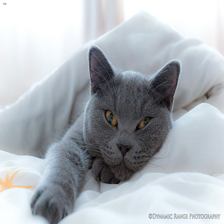

In [100]:
x

In [95]:
y

0

In [ ]:
train_set2 = OxfordPetDataset(train_file_list, class_to_index, index_to_class, transforms.ToTensor())
valid_set2 = OxfordPetDataset(valid_file_list, class_to_index, index_to_class, transforms.ToTensor())
test_set2 = OxfordPetDataset(test_file_list, class_to_index, index_to_class, transforms.ToTensor())

In [ ]:
train_loader = DataLoader(train_set2, batch_size=1000, shuffle=True, drop_last=True)
valid_loader = DataLoader(valid_set2, batch_size=1000)
test_loader = DataLoader(test_set2, batch_size=1000)
train_loader

In [103]:
x, y = train_set2[0]
print(y)
print(x)

0
tensor([[[0.1176, 0.1176, 0.1176,  ..., 0.1725, 0.1686, 0.1608],
         [0.1137, 0.1176, 0.1255,  ..., 0.1804, 0.1765, 0.1686],
         [0.1137, 0.1216, 0.1294,  ..., 0.1843, 0.1804, 0.1725],
         ...,
         [0.0471, 0.0510, 0.0510,  ..., 0.0745, 0.0667, 0.0627],
         [0.0431, 0.0431, 0.0510,  ..., 0.0667, 0.0627, 0.0588],
         [0.0431, 0.0392, 0.0471,  ..., 0.0588, 0.0588, 0.0588]],

        [[0.1490, 0.1490, 0.1490,  ..., 0.2039, 0.2000, 0.1922],
         [0.1451, 0.1490, 0.1569,  ..., 0.2118, 0.2078, 0.2000],
         [0.1451, 0.1529, 0.1608,  ..., 0.2157, 0.2118, 0.2039],
         ...,
         [0.0745, 0.0784, 0.0784,  ..., 0.1059, 0.0980, 0.0941],
         [0.0706, 0.0706, 0.0784,  ..., 0.0980, 0.0941, 0.0902],
         [0.0706, 0.0667, 0.0745,  ..., 0.0902, 0.0902, 0.0902]],

        [[0.1059, 0.1059, 0.1059,  ..., 0.1529, 0.1490, 0.1412],
         [0.1020, 0.1059, 0.1137,  ..., 0.1608, 0.1569, 0.1490],
         [0.1020, 0.1098, 0.1176,  ..., 0.1647, 0.1608, 

In [104]:
print(train_set2)

[Oxford Pet Dataset]
총데이터수: 5217


In [ ]:
#################################################################################################
##################################################################################################
아래 코드 확인해볼 것!!!!! 수업시간에 따로 작성해주신 코드
#################################################################################################
##################################################################################################


In [107]:
import os
import re
from glob import glob
import tarfile
from PIL import Image

from torch.utils.data import Dataset


class OxfordPetDataset2(Dataset):
    
    def __init__(self, root, split, transform=None):
        """
        Parameter:
            root: str - 모든 이미지가 저장된 디렉토리
            split: str - train/valid/test Dataset중 어떤 dataset을 생성할지 .
            transform: callable - 전처리 callable 객체
        """


        self.root = root  # 파일들이 저장된 root 디렉토리.
        self.split = split  # train / valid / test
        self.transform = transform
        # trainset, validation set 구분 기준 index
        self.train_idx = int(200 * 0.7) # trainset 기준 index
        self.val_idx = self.train_idx + int(200*0.2)
        
        # RGB 이미지 빼고 제거 + file_list 생성
        self.file_list = self._remove_not_rgb()
        self.file_list.sort()  
        # index_to_class, class_to_index 생성
        self.index_to_class, self.class_to_index = self._create_class_index()
        # 파일 경로 목록 생성
        self.split_file_list = self._create_split_file_list(split)
   
    def __len__(self):
        return len(self.split_file_list)
        
    def __getitem__(self, index):
        path = self.split_file_list[index]
        # x - input
        img = Image.open(path).convert('RGB') 
        img = img.resize((224, 224)) # Transform에서 처리.
        
        if self.transform is not None:
            img = self.transform(img)       
        # y - output
        class_name = re.sub(r"_\d+\.jpg", "", os.path.basename(path))
        class_index = self.class_to_index[class_name]
        return img, class_index
        
    def __str__(self):
        return f"OxfordPet Dataset\nSplit: {self.split}\n총데이터수: {self.__len__()}"
        
    def _create_split_file_list(self, split):
        """
        split(train/valid/test) 별 파일 경로 list 반환
        Parameter
            split:str train/valid/test 
        return
            list: 파일 경로 List
        """
        split_file_list = []
        cnt = 0
        previous_class = None
        for path in self.file_list:
            file_name = os.path.splitext(os.path.basename(path))[0]  # 디렉토리 빼고 확장자 빼고 파일명만 추출
            class_name = re.sub(r"_\d+", "", file_name)
            if previous_class == class_name:
                cnt += 1
            else:
                cnt = 1

            if split=="train":
                if cnt <= self.train_idx:
                    split_file_list.append(path)
            elif split=="valid":
                if cnt > self.train_idx and cnt <= self.val_idx:
                    split_file_list.append(path)
            elif split=="test":
                if cnt > self.val_idx:
                    split_file_list.append(path)
            else:
                raise Exception(f"split은 train/valid/test 중 하나를 입력하세요.")
            
            previous_class = class_name
            
        return split_file_list

        
    def _create_class_index(self):
        """
        index: class index, class: class_name
        파일명 label을 이용해 index_to_class 리스트, class_to_index dictionary 생성
        return
            tuple: index_to_class, class_to_index
        """
        class_name_set = set()  # 빈 set. 여기에 파일명들을 저장. -> 중복 제거를 위해서 set사용.
        for file in self.file_list:
            file_name = os.path.basename(file)       # Beagle_32.jpg
            label = re.sub(r'_\d+.jpg', "", file_name)  # Beagle
            class_name_set.add(label)
        index_to_class = list(class_name_set)
        index_to_class.sort()   # [A, B, C, ..]  # 리스트 index: class index, value: class Name
        class_to_index = {value:index for index, value in enumerate(index_to_class)}
        return index_to_class, class_to_index

    
    def _remove_not_rgb(self):
        """
        데이터파일에서 RGB 를 제외한 이미지 제거
        """
        file_list = glob(os.path.join(self.root, "*.jpg"))
        for file in file_list:
            # 이미지파일과 연결
            with Image.open(file) as img:
                image_mode = img.mode # "RGB", "L": grayscale, 
                
            if image_mode != "RGB": # RGB 가 아닌 파일은 제거
                os.remove(file)
        
        return glob(os.path.join(self.root, "*.jpg"))  # 파일목록 리턴

    
    

In [108]:
root = "datasets/oxfordpet/images/"
trainset = OxfordPetDataset2(root, "train")
validset = OxfordPetDataset2(root, "valid")
testset = OxfordPetDataset2(root, "test")

In [109]:
z, y = trainset[0]
print(y)

0


In [ ]:
#################################################################################################
##################################################################################################
#################################################################################################
확인해볼것!!!
##################################################################################################
#################################################################################################
##################################################################################################


## torchvision.datasets.ImageFolder 이용

-   영구저장장치(HDD)에 파일로 저장된 image들을 쉽게 로딩할 수 있도록 한다.
-   train/validation/test 데이터셋을 저장하는 디렉토리에 class 별로 디렉토리를 만들고 이미지를 저장한다.

![img](figures/06_image_folder_dir.png)


In [111]:
# gdown: google drive 의 파일을 다운로드 하는 라이브러리.
!pip install gdown --upgrade -q

In [67]:
import os
from zipfile import ZipFile
import gdown


def down_extract():
    os.makedirs("data", exist_ok=True)
    url = "https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV"
    fname = "data/cats_and_dogs_small.zip"

    gdown.download(url, fname, quiet=False)

    # zipfile모듈: Zip 압축파일을 다루는 모듈(압축하기, 풀기)
    from zipfile import ZipFile

    # 압축풀기: ZipFile(압축파일경로).extractall(풀경로) # 디렉토리 없으면 생성해 준다.
    with ZipFile(fname) as zipFile:
        zipFile.extractall(os.path.join("data", "cats_and_dogs_small"))


down_extract()

Downloading...
From (original): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV
From (redirected): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV&confirm=t&uuid=3e6f1093-d976-465a-9309-468b8641696a
To: c:\Users\Playdata\Documents\class\my_data\09_deeplearning_pytorch\data\cats_and_dogs_small.zip
100%|██████████| 90.8M/90.8M [00:03<00:00, 25.4MB/s]


In [ ]:
# cd  - train (D) - cats (C) - images (X) [0]
#     - test
#     - valid (D) - dogs (C) - images (y) [1]


### D - directory /  C - class

In [118]:
from torchvision.datasets import ImageFolder
import os
root_path = "data/cats_and_dogs_small"
# os.path.join(root_path, "train")


In [116]:
trainset = ImageFolder(os.path.join(root_path, "train"))  # (ataset이 있는 root 경로, transform=전처리기)
validset = ImageFolder(os.path.join(root_path, "validation"))
testset = ImageFolder(os.path.join(root_path, "test"))

In [119]:
len(trainset), len(validset), len(testset)

(2000, 1000, 1000)

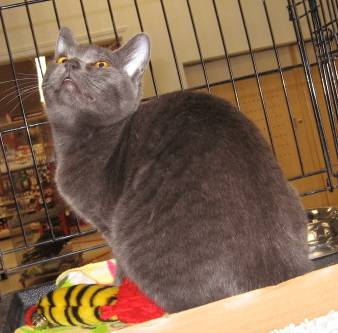

In [147]:
trainset[0]
trainset[232][0]

In [148]:
trainset.classes

['cats', 'dogs']

In [ ]:
trainset.class_to_idx # 단순 오름차순 정렬로 고양이 우선.

{'cats': 0, 'dogs': 1}

In [150]:
trainset = ImageFolder(os.path.join(root_path, "train"))  # (ataset이 있는 root 경로, transform=전처리기)
validset = ImageFolder(os.path.join(root_path, "validation"))
testset = ImageFolder(os.path.join(root_path, "test"), transform=transforms.ToTensor())

In [152]:
i = testset[0][0]
i.min(), i.max()

(tensor(0.), tensor(1.))

## 메모리상의 Tensor, ndarray 타입의 데이터를 이용해 Dataset생성

-   torch.utils.data.TensorDataset 이용
-   parameter
    -   input: Tensor
    -   output: Tensor


In [154]:
import pandas as pd
iris = pd.read_csv("data/iris.data", header=None, names=["sepal length", "sepal width", "petal length", "petal width", "label"])
iris.shape

(150, 5)

In [155]:
iris.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [156]:
X = iris.drop(columns='label').values
y = iris['label'].values

In [159]:
# y값을 label encoding
from sklearn.preprocessing import LabelEncoder
y_le = LabelEncoder()
y = y_le.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0])

In [162]:
# train/test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [163]:
from torch.utils.data import TensorDataset
# (X, y) : X/y는 Tensor 타입
trainset = TensorDataset(
    torch.tensor(X_train),  # input
    torch.tensor(y_train),  # output
)
testset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

In [164]:
trainset[0]

(tensor([4.8000, 3.0000, 1.4000, 0.3000], dtype=torch.float64), tensor(0))

In [ ]:
y_le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# 모델 성능 평가를 위한 데이터셋 분리

-   **Train 데이터셋 (훈련/학습 데이터셋)**
    -   모델을 학습시킬 때 사용할 데이터셋.
-   **Validation 데이터셋 (검증 데이터셋)**
    -   모델의 성능 중간 검증을 위한 데이터셋
-   **Test 데이터셋 (평가 데이터셋)**
    -   모델의 성능을 최종적으로 측정하기 위한 데이터셋
    -   **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용한다.**

## 검증(validation), 평가(test) 데이터셋을 나누는 이유

-   모델을 훈련하고 성능 검증했을 때 원하는 성능이 나오지 않으면 모델의 여러 설정(하이퍼파라미터)들을 수정한 뒤에 다시 훈련시키고 검증을 하게 된다. 그리고 원하는 성능이 나올때 까지 설정변경->훈련->검증을 반복하게 된다. 이 작업이 **모델링(Modeling)** 이다.
-   위 사이클을 반복하게 되면 검증 결과를 바탕으로 설정을 변경하게 되므로 검증 할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두 개의 데이터셋만 사용하게 되면 **모델의 성능을 제대로 평가할 수 없게 된다.** 그래서 데이터셋을 train set, validation set, test set으로 나눠 train set 와 validation set을 사용해 훈련과 검증을 해 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

> -   **(Parameter)머신러닝 모델 파라미터**
>     -   성능에 영향을 주는 값으로 최적화의야 하는 대상내는 값을 찾아야 한다.
>         -   **하이퍼파라미터(Hyper Parameter)**
>             -   사람이 직접 설정해야하는 파라미터 값으로 주로 어떻게 모델을 학습시킬지에 대한 모델설정 값이다.
>             -   딥러닝에서는 학습률, Epoch수, batch size, optimizer, loss 함수 등 다양한 하이퍼파라미터가 있다.
>         -   **파라미터(Parameter)**
>             -   모델의 함수를 데이터에 맞추기 위한 값으로 학습을 통해 찾는 변수.
>             -   딥러닝 모델에서는 weight와 bias 가 파라미터다.


## Dataset 분리

### torch.utils.data.Subset을 이용

-   Dataset의 일부를 가지는 부분집합 데이터셋을 생성
-   주로 사용하는 곳
    1. 데이터 셋을 분리
    2. 전체 데이터 셋에서 일부 데이터를 추출 할 때
    3. 데이터셋에서 특정 데이터만 골라서 추출할 때 (ex: 특정 class만 추출하는 경우)


In [166]:
import torch
from torch.utils.data import TensorDataset, Subset

In [168]:
inputs = torch.arange(1, 11).reshape(5, 2)
outputs = torch.arange(5).reshape(5, 1)
inputs.shape, outputs.shape

(torch.Size([5, 2]), torch.Size([5, 1]))

In [169]:
dataset = TensorDataset(inputs, outputs)
len(dataset)

5

In [170]:
# dataset 의 5개중에 3개를 골라서 subset 을 생성.
sub1 = Subset(dataset, [1, 2, 4])  # 가져올 Dataset, 가져올 index들)
sub2 = Subset(dataset, [0, 3])
len(sub1), len(sub2)

(3, 2)

In [171]:
for i in sub1:
    print(i)

(tensor([3, 4]), tensor([1]))
(tensor([5, 6]), tensor([2]))
(tensor([ 9, 10]), tensor([4]))


In [172]:
for i in sub2:
    print(i)

(tensor([1, 2]), tensor([0]))
(tensor([7, 8]), tensor([3]))


In [175]:
inputs

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [176]:
from torchvision import datasets
m_trainset = datasets.MNIST("datasets", train=True, download=True)
len(m_trainset)

60000

In [178]:
all_index = torch.randperm(len(m_trainset))  # 0 ~ 지정한 숫자까지 지정한 섞어서 반환함.
train_index = all_index[:50000]
valid_index = all_index[50000:]

In [179]:
m_trainset2 = Subset(m_trainset, train_index)
m_valid2 = Subset(m_trainset, valid_index)
len(m_trainset2), len(m_valid2)

(50000, 10000)

In [177]:
torch.arange(50000)

tensor([    0,     1,     2,  ..., 49997, 49998, 49999])

### random_split() 함수 이용

-   Dataset객체와 나눌 데이터셋들의 원소개수를 리스트로 묶어서 전달하면 Shuffle후 나눈뒤 그 결과를 Subset객체들을 리스트에 담아 반환한다.


In [180]:
from torch.utils.data import random_split
sub1, sub2, sub3 = random_split(
    m_trainset,             # 나눌 대상의 Dataset
    [40000, 10000, 10000],  # [몇개씩으 나눌지 개수를 지정함.]
)

In [181]:
len(sub1), len(sub2), len(sub3)

(40000, 10000, 10000)

In [ ]:
# random suffle 반환하는 함수.